In [1]:
# import library
import sys
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import matplotlib.pyplot as plt

## Problem 2. MNIST
MNIST dataset은 총 70,000개의 28x28 저해상도 흑백 이미지를 포함하고 있다. 따라서 하나의 이미지는 (28,28,1) 배열의 형태로 정의할 수 있다. 전체 데이터 셋에서 이미지가 속한 클래스는 총 10개로 0부터 9까지의 숫자에 대한 손글씨 이미지이다. 70,000개 중 60,000개는 train과 validation set에, 10,000개는 test set에 포함된다.

#### (a) Keras에 내장된 mnist dataset을 불러들인 후 train data와 test data로 분리하시오.

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f'x_train : {x_train.shape}') # (데이터 개수, 28 X 28 pixel)
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


#### (b) 이미지를 model에 넣기 위해 각 pixel의 값을 숫자로 변형시키는 전처리 과정을 수행하고, data normalization을 하시오

In [5]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
# reshaping mnist dataset
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [6]:
# data normalization: Scale images to the [0, 1] range
x_train /= 255.
x_test /= 255.

#### (c) 필요한 변수에 대하여 one-hot encoding을 하시오.

In [7]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#### (d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서, 좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에 변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오. 이때, 모든 모델은 pooling layer를 반드시 포함하며, 적어도 하나의 모델은 drop out을 하이퍼 파라미터로 설정하시오. (모델에 대한 코드를 반드시 첨부할 것.)


In [8]:
## convolutional nueral network 

# model1
model1 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [9]:
# model1
model1.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
hist = model1.fit(x_train, y_train, batch_size=128, epochs=10, 
                  verbose=1, validation_data=(x_test, y_test)) # epochs 조정
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(score[0],3))
print('Test accuracy:', round(score[1],3))

Epoch 1/10
469/469 [==============================] - 36s 73ms/step - loss: 0.3550 - accuracy: 0.8909 - val_loss: 0.0905 - val_accuracy: 0.9721
Epoch 2/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1113 - accuracy: 0.9664 - val_loss: 0.0597 - val_accuracy: 0.9802
Epoch 3/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0843 - accuracy: 0.9738 - val_loss: 0.0457 - val_accuracy: 0.9848
Epoch 4/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0390 - val_accuracy: 0.9881
Epoch 5/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0349 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 7/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0278 - val_accuracy:

In [11]:
# model2
model2 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dense(num_classes, activation = 'softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [13]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
hist = model2.fit(x_train, y_train, batch_size=128, epochs=5, 
                  verbose=1, validation_data=(x_test, y_test)) # epochs 조정
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(score[0],3))
print('Test accuracy:', round(score[1],3))

Epoch 1/5
469/469 [==============================] - 34s 69ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0514 - val_accuracy: 0.9834
Epoch 2/5
469/469 [==============================] - 33s 70ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0377 - val_accuracy: 0.9873
Epoch 3/5
469/469 [==============================] - 33s 69ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0332 - val_accuracy: 0.9889
Epoch 4/5
469/469 [==============================] - 33s 70ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 5/5
469/469 [==============================] - 32s 69ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0356 - val_accuracy: 0.9878
Test loss: 0.036
Test accuracy: 0.988


In [16]:
# model3
model3 = keras.Sequential([
    layers.Conv2D(12, kernel_size = (5, 5), strides = 1, 
                  activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(24, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 12)        312       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 12)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 24)        1176      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 24)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 600)               0         
                                                                 
 dropout_1 (Dropout)         (None, 600)              

In [17]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
hist = model3.fit(x_train, y_train, batch_size=64, epochs=3, 
                  verbose=1, validation_data=(x_test, y_test)) # epochs 조정
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(score[0],3))
print('Test accuracy:', round(score[1],3))

Epoch 1/3
938/938 [==============================] - 28s 28ms/step - loss: 0.4035 - accuracy: 0.8744 - val_loss: 0.0981 - val_accuracy: 0.9733
Epoch 2/3
938/938 [==============================] - 25s 27ms/step - loss: 0.1408 - accuracy: 0.9578 - val_loss: 0.0687 - val_accuracy: 0.9791
Epoch 3/3
938/938 [==============================] - 25s 27ms/step - loss: 0.1131 - accuracy: 0.9654 - val_loss: 0.0565 - val_accuracy: 0.9815
Test loss: 0.056
Test accuracy: 0.982


In [19]:
# model4
model4 = keras.Sequential([
    layers.Conv2D(36, kernel_size = (2, 2), strides = 1, 
                  activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (4, 4), strides = 2),
    layers.Conv2D(72, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 36)        180       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 36)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 72)        10440     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 72)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1800)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1800)             

In [23]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
hist = model4.fit(x_train, y_train, batch_size=256, epochs=3, 
                  verbose=1, validation_data=(x_test, y_test)) # epochs 조정
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(score[0],3))
print('Test accuracy:', round(score[1],3))

Epoch 1/3
235/235 [==============================] - 39s 158ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0467 - val_accuracy: 0.9856
Epoch 2/3
235/235 [==============================] - 38s 161ms/step - loss: 0.0656 - accuracy: 0.9791 - val_loss: 0.0440 - val_accuracy: 0.9869
Epoch 3/3
235/235 [==============================] - 35s 147ms/step - loss: 0.0625 - accuracy: 0.9802 - val_loss: 0.0425 - val_accuracy: 0.9856
Test loss: 0.042
Test accuracy: 0.986


In [25]:
# model5
model5 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (2, 2), strides = 1, 
                  activation = 'sigmoid', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (4, 4), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'sigmoid'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [26]:
model5.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
hist = model5.fit(x_train, y_train, batch_size=128, epochs=3, 
                  verbose=1, validation_data=(x_test, y_test)) # epochs 조정
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(score[0],3))
print('Test accuracy:', round(score[1],3))

Epoch 1/3
469/469 [==============================] - 42s 86ms/step - loss: 1.8241 - accuracy: 0.3701 - val_loss: 0.6234 - val_accuracy: 0.8105
Epoch 2/3
469/469 [==============================] - 40s 86ms/step - loss: 0.6093 - accuracy: 0.8031 - val_loss: 0.4346 - val_accuracy: 0.8671
Epoch 3/3
469/469 [==============================] - 40s 85ms/step - loss: 0.4891 - accuracy: 0.8459 - val_loss: 0.3608 - val_accuracy: 0.8924
Test loss: 0.361
Test accuracy: 0.892


#### (e) (d)의 결과에 대하여 모델별로 confution matrix를 구하시오. 어떤 모델의 성능이 가장 좋은가?

: 오분류율이 가장 낮고, 정확도가 0.991로 가장 높은 model1의 성능이 가장 좋다. 

In [10]:
from sklearn.metrics import confusion_matrix

# model1
y_pred=model1.predict(x_test)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(y_test,axis=1)

conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

313/313 [==============================] - 3s 9ms/step
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1131    3    0    0    0    0    1    0    0]
 [   1    2 1021    0    2    0    1    3    2    0]
 [   0    0    3 1002    0    3    0    1    1    0]
 [   0    0    0    0  975    0    1    0    1    5]
 [   2    0    0    3    0  886    1    0    0    0]
 [   3    2    0    0    1    2  950    0    0    0]
 [   0    1    9    0    0    1    0 1014    1    2]
 [   2    0    2    0    1    1    0    0  967    1]
 [   2    1    0    0    4    5    0    4    3  990]]


In [14]:
# model2
y_pred=model2.predict(x_test)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(y_test,axis=1)

conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

313/313 [==============================] - 3s 9ms/step
[[ 967    0    1    0    2    0    4    2    3    1]
 [   0 1129    1    2    1    0    1    1    0    0]
 [   1    3 1000    9    3    0    1    8    7    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0   17    0  869    1    2    1    1]
 [   1    2    0    0    3    1  949    0    2    0]
 [   0    2    1    3    2    0    0 1019    1    0]
 [   2    0    1    1    1    1    0    2  963    3]
 [   0    0    0    0    7    2    0    7    0  993]]


In [18]:
# model3
y_pred=model3.predict(x_test)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(y_test,axis=1)

conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

313/313 [==============================] - 2s 7ms/step
[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1127    3    2    1    0    0    0    2    0]
 [   3    5 1007    1    2    0    0    9    5    0]
 [   1    0    2  990    0    8    0    7    2    0]
 [   1    2    1    0  973    0    1    1    1    2]
 [   2    1    0    2    0  885    1    1    0    0]
 [  10    4    0    0    2    5  934    0    3    0]
 [   1    5   12    1    0    1    0  998    3    7]
 [   5    2    2    1    2    3    2    4  943   10]
 [   1    5    0    1    7    3    0    6    5  981]]


In [24]:
# model4
y_pred=model4.predict(x_test)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(y_test,axis=1)

conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

313/313 [==============================] - 3s 9ms/step
[[ 974    0    2    0    0    1    1    1    1    0]
 [   0 1131    1    1    0    0    1    0    1    0]
 [   3    0 1021    0    1    0    1    6    0    0]
 [   1    0    3  992    0    8    0    4    2    0]
 [   1    1    0    0  976    0    0    1    1    2]
 [   2    0    1    3    0  882    1    1    2    0]
 [   6    2    0    0    1    4  944    0    1    0]
 [   0    3   11    1    0    0    0 1007    3    3]
 [   6    0    2    1    2    2    0    3  954    4]
 [   4    4    1    1    9    6    0    5    4  975]]


In [27]:
# model5
y_pred=model5.predict(x_test)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(y_test,axis=1)

conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

313/313 [==============================] - 3s 9ms/step
[[ 952    0    1    3    1    4    5    3   10    1]
 [   0 1110    2    3    0    0    6    0   14    0]
 [  21   14  878    8   16    4   20   27   36    8]
 [  12    6   29  856    0   24    3   17   52   11]
 [   6    3    8    1  864    5   21   11    4   59]
 [  15    7    6   44    9  748   24    5   28    6]
 [   6    6    3    0    4   16  916    3    3    1]
 [   0   21   28    6   11    2    1  886    6   67]
 [  17    9   16   22    4   22   16   10  840   18]
 [  12   10    6   13   35    5    0   40   14  874]]


#### (f) (d)에서 정의한 모델 중 하나를 선택하여 callback option을 설정하여 학습을 진행할 것이다. epoch=100, batch_size=32으로 설정한 후, Call back option을 사용하여 model의 accuracy가 20번 동안 좋아지지 않으면 학습을 멈추도록 설정하시오. 또한, training history를 시각화하여 plot을 첨부하시오

In [28]:
# model1
model1 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, 
                  activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        8256      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [31]:
# setting callback option
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = "val_accuracy", patience = 20)
mc = ModelCheckpoint("./model/checkpoint.{epoch:02d}.hdf5", 
                     monitor = "val_accuracy")
# plot diagnostic learning curves
def summarize_diagnostics(history):
 plt.subplots(figsize = (15,6))
 plt.subplots_adjust(left=0.1, bottom=0.1, right=0.99, 
                     top=0.9, wspace=0.3, hspace=0.2)
 
 # plot loss
 plt.subplot(121)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 plt.legend()
 
 # plot accuracy
 plt.subplot(122)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 plt.legend()


Epoch 1/100
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.0278 - val_accuracy: 0.9902
Epoch 2/100
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0249 - val_accuracy: 0.9925
Epoch 3/100
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0253 - val_accuracy: 0.9912
Epoch 4/100
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0225 - val_accuracy: 0.9922
Epoch 5/100
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.0274 - val_accuracy: 0.9914
Epoch 6/100
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0258 - val_accuracy: 0.9914
Epoch 7/100
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0

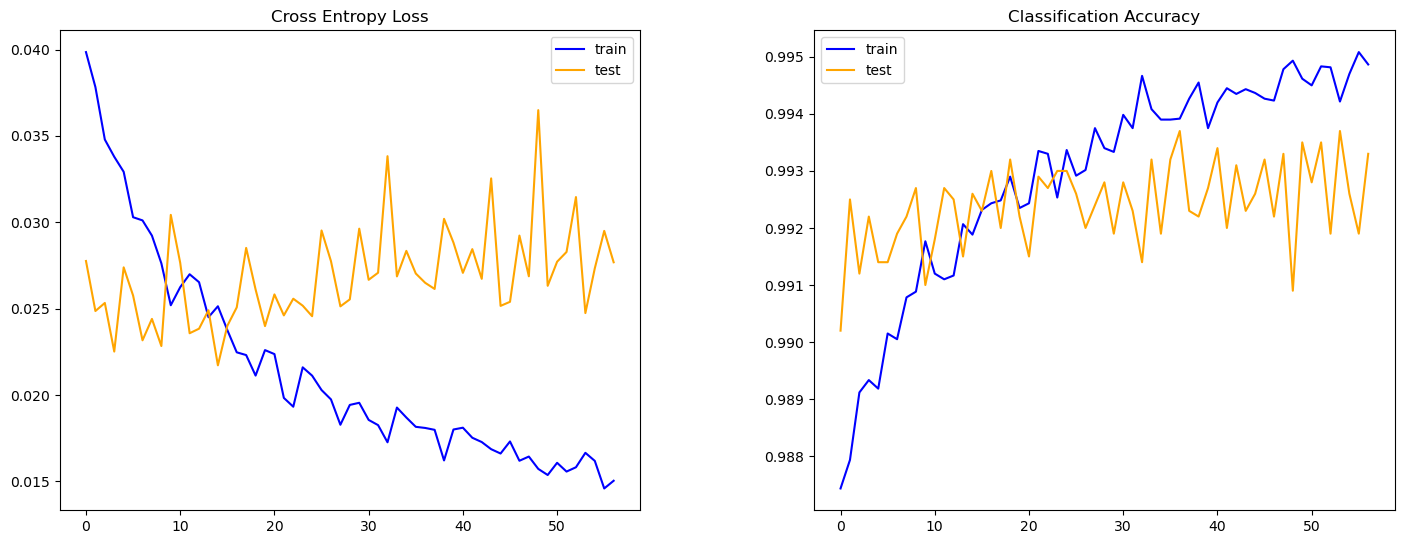

In [33]:
# training
history = model1.fit(x_train, y_train, epochs = 100, batch_size = 32,
 validation_data = (x_test, y_test), verbose =1, callbacks = [es, mc])
# history
summarize_diagnostics(history)